# Requirement 1d

## LeCun activation function: 

$$LeCun(x)=1.7159\cdot tanh(\frac{2}{3}x) + 0.01x \rightarrow LeCun(x)'=1.7159\cdot \frac{2}{3}\cdot(1-(tanh(\frac{2}{3}x))^2)+0.01=$$ $$=1.1439\cdot(1-(tanh(\frac{2}{3}x))^2)+0.01$$

After substituting this activation function in the backpropagation equations, we obtain:

$$\delta_{i\mu}^{(R)} = 1.1439\cdot(1-(tanh(\frac{2}{3}\nu_{i\mu}^{(R)}))^2)+0.01)(y_{i\mu}^{(R)}-T_{i\mu})$$
$$\delta_{i\mu}^{(r)} = \sum_{k} \delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}\cdot 1.1439\cdot(1-(tanh(\frac{2}{3}\nu_{i\mu}^{(r)}))^2)+0.01)$$

If we do the calculations by hand for finding the maximum or by inspecting the plot of the derivative function, we find that the maximum is at the point $x_0=0$ with $LeCun(x_0)'=1.1439+0.01=1.1539$.

Also, since the limits on $\pm \infty$ are $0$, the gradients range is $[0.00, 1.1539]$ which is larger than the one we obtained with the "simple" tanh function.

Furthermore, after comparing this function to the tanh, we can see that it gives as output larger values and is steeper close to the origin of the axis.

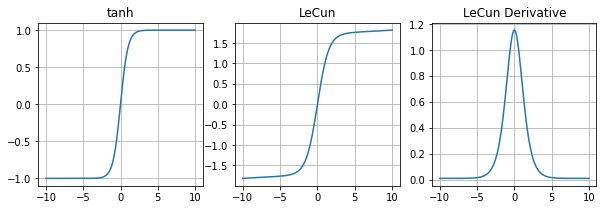

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plots of the LeCun activation function and its derivative.

x = np.linspace(-10, 10, 400)

tanh = np.tanh(x)
lecun = 1.7159 * np.tanh(2.0/3.0 * x) + 0.01 * x
lecun_der = 1.1439 * (1.0 - np.square(np.tanh(2.0/3.0 * x))) + 0.01



fig, axs = plt.subplots(1, 3, figsize=(10,3))
axs[0].plot(x, tanh)
axs[1].plot(x, lecun)
axs[2].plot(x, lecun_der)

axs[0].title.set_text('tanh')
axs[1].title.set_text('LeCun')

axs[2].title.set_text('LeCun Derivative')


for i in range(0,3):
  axs[i].grid()

## Development of FC neural networks using the custom LeCun activation function.

In this section we will develop neural networks based on the topologies of Requirement 1b (FC networks with 5-20-40 hidden layers with 32 neurons each). We will train these networks using the $tanh(x)$ and the $LeCun(x)$ for the activation function of the hidden layers.

In [ ]:
from tensorflow import keras
import keras.models as m
import keras.layers as l

from keras.datasets import mnist

# For the custom activation function
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects



In [ ]:
# Load MNIST dataset in train and test sets.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Expand dims to (batch_size, height, width, channels).
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

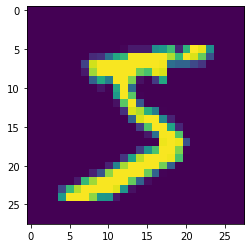

In [ ]:
# Normalize to 0.0-1.0 from 0-255 for quicker convergence and plot a number.
X_train = X_train / 255.0
X_test = X_test / 255.0
plt.imshow(np.squeeze(X_train[0]))

In [ ]:
# Convert y_train from a single value 0-9 to an one hot vector.
print(y_train[0])
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Definition of LeCun activation function and passing it to the keras activations dictionary.
def lecun_activation(x):
    return (1.7159 * K.tanh( 2.0/3.0 * x)) + 0.01*x

get_custom_objects().update({'lecun_activation': Activation(lecun_activation)})

In [ ]:
def define_model(activation, hidden_layers):
  # Definition of a modular model having hidden_layers hidden layers with activation 'activation'.
  # The input shape is 28*28 which is flattened to a 1-D vector and then passed through the network.
  # The output is 10 neurons correspoding to the probabilities of having as output each class.
  
  inputs = keras.Input(shape=(28,28))
  fl = l.Flatten()(inputs)

  for i in range(hidden_layers):
    if i==0:
      hidden_layer = l.Dense(32, activation=activation)(fl)
    else:
      hidden_layer = l.Dense(32, activation=activation)(hidden_layer)
  outputs = l.Dense(10, activation="softmax")(hidden_layer)
  model = m.Model(inputs, outputs)

  model.compile(optimizer= keras.optimizers.SGD(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
# Example of a model having 10 hidden layers and the tanh activation function.
model_tanh = define_model('tanh',10)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056  

In [ ]:
# Example of a model having 5 hidden layers and the lecun activation function.
model_lecun = define_model('lecun_activation', 5)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 32)                1056

In [ ]:
# Train models having 5, 20, 40 hidden layers for 30 epochs on the MNIST dataset.

hidden_layers = [5, 20, 40]
histories_tanh = []
histories_lecun = []

for hidden_layer in hidden_layers:
  model_tanh = define_model('tanh', hidden_layer)

  history_tanh = model_tanh.fit(X_train, 
                                y_train, 
                                epochs=30, 
                                batch_size=32, 
                                validation_data=(X_test, y_test))
  
  model_lecun = define_model('lecun_activation', hidden_layer)
  history_lecun = model_lecun.fit(X_train, 
                                y_train, 
                                epochs=30, 
                                batch_size=32, 
                                validation_data=(X_test, y_test))
  
  histories_tanh.append(history_tanh)
  histories_lecun.append(history_lecun)  

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 32)                25120     
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 32)                1056

In [ ]:
def plot_history(history_tanh, history_lecun, hidden_layers):
    """
        Plots accuracy and loss on train and validation on all sets during training.
    """
    
    acc_tanh = history_tanh.history['accuracy']
    val_acc_tanh = history_tanh.history['val_accuracy']
    loss_tanh = history_tanh.history['loss']
    val_loss_tanh = history_tanh.history['val_loss']

    acc_lecun = history_lecun.history['accuracy']
    val_acc_lecun = history_lecun.history['val_accuracy']
    loss_lecun = history_lecun.history['loss']
    val_loss_lecun = history_lecun.history['val_loss']

    x = range(1, len(acc_tanh)+1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc_tanh, 'b', label=f'train acc tanh')
    plt.plot(x, val_acc_tanh, 'r', label=f'val acc tanh')
    plt.plot(x, acc_lecun, 'c', label=f'train ac lecun')
    plt.plot(x, val_acc_lecun, 'm', label=f'val acc lecun')
    plt.title(f'Accuracy in train and val set using {hidden_layers} hidden layers.')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss_tanh, 'b', label=f'train loss tanh')
    plt.plot(x, val_loss_tanh, 'r', label=f'val loss tanh')
    plt.plot(x, loss_lecun, 'c', label=f'train loss lecun')
    plt.plot(x, val_loss_lecun, 'm', label=f'val loss lecun')
    plt.title(f'Accuracy in train and val set using {hidden_layers} hidden layers.')
    plt.legend()


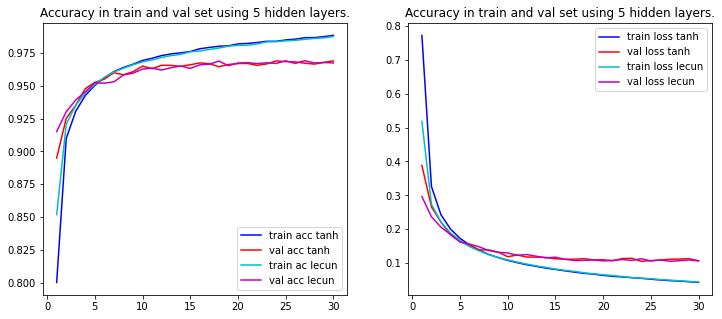

In [ ]:
plot_history(histories_tanh[0], histories_lecun[0], hidden_layers[0])

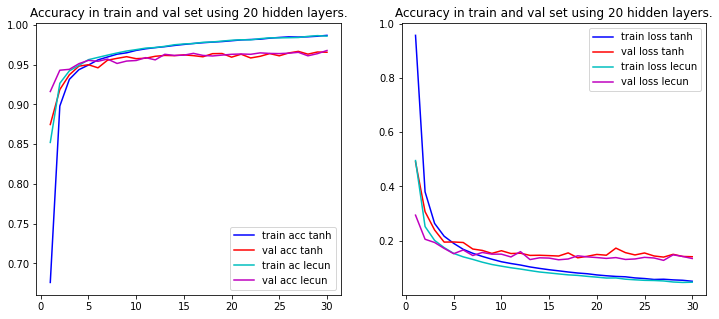

In [ ]:
plot_history(histories_tanh[1], histories_lecun[1], hidden_layers[1])

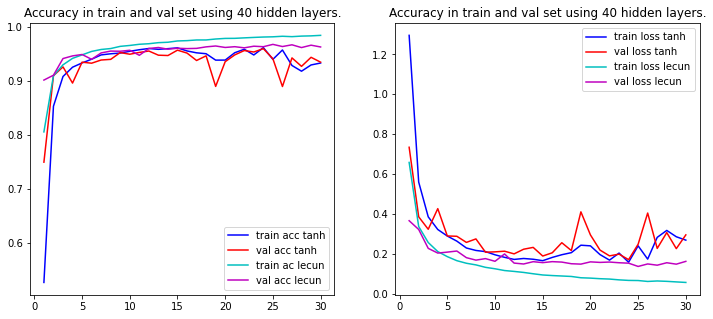

In [ ]:
plot_history(histories_tanh[2], histories_lecun[2], hidden_layers[2])

From the accuracy and loss curves of the train and validation sets during training we can infer that:
* In the case of the shallowest network of 5 hidden layers, the LeCun activation function seems to outperform the tanh one in the first epochs. This phenomenon is quickly negated after $\approx$ the 5th epoch, and the metrics start tending to the same values. The overfitting in both networks begins at approximately the 10th epoch, when the validation loss starts becoming stable or increasing slightly.
* In the case of the network with the 20 hidden layers we observe the same pattern, with the LeCun function performing better during the first epochs and then tending to the same results / marginally better than the the tanh activation. Here, the overfitting starts in the same range of epochs as before. However, due to the larger number of parameters, within the same number of epochs of the training algorithm, the train accuracy here tends to 1.00 due to the larger overfitting.
* However, in the case of our very deep network of 40 layers, the LeCun function performs better than the tanh one, for all 30 epochs. It also leads to smoother plots (both for the loss and for the accuracy). The overfitting for the LeCun function begins in the same range of epochs as before, and while we don't observe any signs of overfitting in the case of the tanh activation, the plots we get for this one are rather unsmooth.

This activation function was introduced by Yann LeCun in the papers 'Efficient BackProp' and 'Generalization and Network Design Strategies'. It was proposed as an improvement to the sigmoid and tanh activation function. Its parameters were chosen so that $f(\pm 1)=\pm 1$, with the rationale that the activation transform ("squashing transformation") is around 1 in normal operating conditions. Also, the value $f''(x)$ is maximum at $\pm 1$ which was said to improve the convergence at the end of the training. The factor $0.01x$ was added to "break" the symmetry of a normal sigmoid/tanh which may help to avoid the flat regions of the loss function.

From our empirical results on the models we trained, we can observe that overally, this function is better or equal to the tanh function in terms of performance. One other thing we take from our graphs, is that in general LeCun activation function starts the training with better metric scores (accuracy and loss) than the tanh activation function, and it also yields smoother learning curves, and all these hold for all the models we trained. It seems that when using this function as an activation, we can converge faster and better to the minimum of the categorical crossentropy function we used.


What we have to make note of though, is that this function is not universally better, as the entire problem depends on the dataset we use, the choice of loss function and the optimizer. We will discuss in the end the problem with the vanishing gradients.

## Plot of gradients

Following the method we used in Requirement 1C, we will plot the gradients of the untrained model topologies of Requirement 1B using the tanh and LeCun activation function. As the gradient of the loss requires a "movement" towards a direction in a multi-dimensional space, we will reuse the same logic (and code) as before, breaking out of the loop on the minibatches after we update the gradients one time.

After getting the derivatives after the 1st minibatch, we will plot the mean and maximum value of each layer gradient in the same way as before, with respect to the layer depth.

In [ ]:
def define_model_return_layers(activation, hidden_layers):
  # Definition of a modular model in the same way as before but returning a list of all the model's layers.

  layers = []
  
  inputs = keras.Input(shape=(28,28))
  fl = l.Flatten()(inputs)

  for i in range(hidden_layers):
    if i==0:
      layer = l.Dense(32, activation=activation)
      hidden_layer = layer(fl)
    else:
      layer = l.Dense(32, activation=activation)
      hidden_layer = layer(hidden_layer)

    layers.append(layer)

  layer = l.Dense(10, activation="softmax")
  outputs = layer(hidden_layer)
  layers.append(layer)
  model = m.Model(inputs, outputs)
  

  model.compile(optimizer= keras.optimizers.SGD(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
  print(model.summary())
  return model, layers

In [ ]:
# split training set into batches of 64 samples
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((X_train.reshape(60000, 28, 28, 1).astype("float32"), y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)


optimizer=keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
def training_loop(model, layers, layers_gradients):
  for step, (x, y) in enumerate(dataset):

      # Open a GradientTape.
      with tf.GradientTape(persistent=True) as tape:

          # Loss value for this batch.
          loss = tf.keras.losses.CategoricalCrossentropy()(y, model(x))

        
      # Get gradients of the loss wrt the weights.
      gradients = [[] for i in range(len(layers))]
        
       
      for i in range(len(layers)):
        gradients[i] = tape.gradient(loss, layers[i].trainable_weights)
          
      # Keep gradients for the 1st batch -> Break after the first update.
      if step == 63:
        for i in range(len(layers_gradients)):
          layers_gradients[i].append(gradients[i])
        break
      

      # Update the weights of our layers.

      for i in range(len(layers)):
        optimizer.apply_gradients(zip(gradients[i], layers[i].trainable_weights))
       
        
      # Logging.
      if step % 100 == 0:
          print("Step:", step, "Loss:", float(loss))

  return layers_gradients


In [ ]:
hidden_layers = [5, 20, 40]
activations = ['tanh', 'lecun_activation']

total_results_max = []
total_results_mean = []

for activation in activations:
  for hidden_layer in hidden_layers:
    model, layers = define_model_return_layers('tanh', hidden_layer)
    layer_gradients = [[] for i in range(len(layers))]

    layer_gradients = training_loop(model, layers, layer_gradients)
    
    results_max = []
    results_mean = []
    for gradient in layer_gradients:
      w, b = gradient[0]
      results_max.append(np.max(w))
      results_mean.append(np.mean(w))
    
    total_results_max.append(results_max)
    total_results_mean.append(results_mean)    

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_487 (Dense)           (None, 32)                25120     
                                                                 
 dense_488 (Dense)           (None, 32)                1056      
                                                                 
 dense_489 (Dense)           (None, 32)                1056      
                                                                 
 dense_490 (Dense)           (None, 32)                1056      
                                                                 
 dense_491 (Dense)           (None, 32)                105

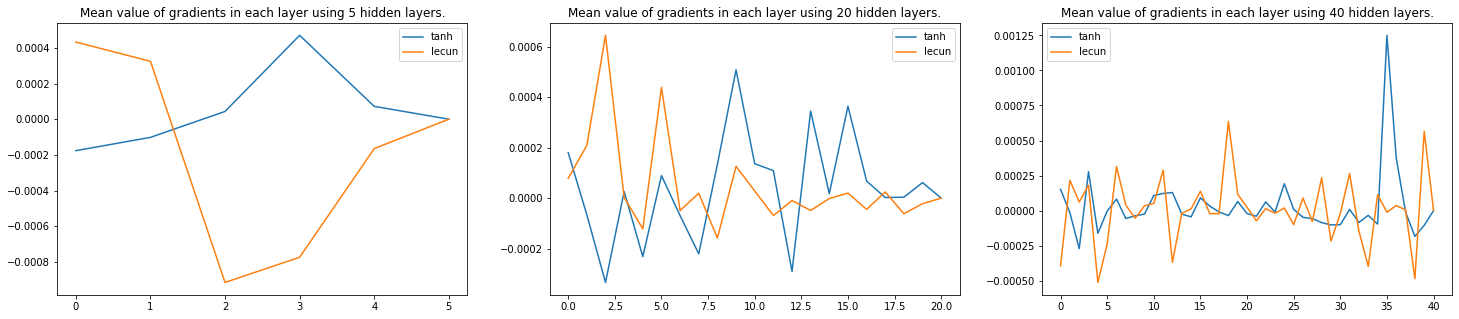

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(25,5))

for i in range(3):
  axs[i].plot(total_results_mean[i], label='tanh')
  axs[i].plot(total_results_mean[i+3], label='lecun')
  axs[i].title.set_text(f"Mean value of gradients in each layer using {hidden_layers[i]} hidden layers.")
  axs[i].legend()

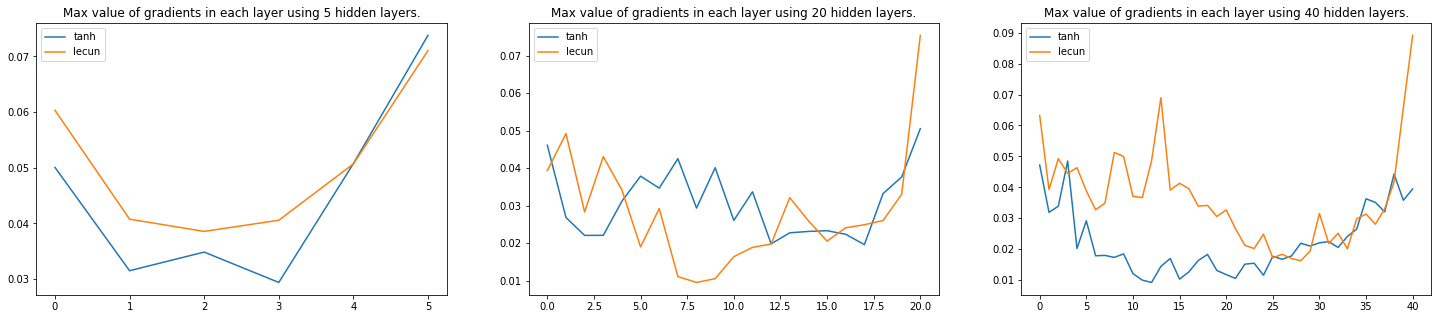

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(25,5))

for i in range(3):
  axs[i].plot(total_results_max[i], label='tanh')
  axs[i].plot(total_results_max[i+3], label='lecun')
  axs[i].title.set_text(f"Max value of gradients in each layer using {hidden_layers[i]} hidden layers.")
  axs[i].legend()

* The results from the plots of the mean values don't seem to be very different for our two choices of activation functions, and this holds for all of the architectures we trained. This isn't probably an ubsurd conclusion considering that we managed to train all of our models without any particular problems, and in most cases our results were quite similar for both of our choices of activation functions. Maybe the only thing we can infer is that in the case of our models with the 40 hidden layers, the values of the gradients seem to be closer to 0 as we move from the output to the input layers, in the case of the tanh activation. This might be an explaination for the rather unsmooth learning curves we got for this architecture and this choice of activation function. Also, there is randomness in the way the weights are initialized in the beginning of the training and we are looking at these values at an early stage so these results may not be very definite.

* The results from the plot of the max values in each layer however give us a better view on the performance of the two activation functions. 
First of all, we observe that the values of the gradients are generally larger in the output layers, and this holds for all of our models. Moreover, it seems that the LeCun activation gives larger values of the gradient, and this holds  in almost all the layers of all of our models. From this observation we can explain why this function in general gave us better training results. 
Moreover, it is most probable that LeCun won't suffer from the vanishing gradient problem as much as its opponent tanh might do. Its gradient values being larger, means that the weight updates of our networks layers won't diminish that much during backpropagation, thus preventing training.

The better metrics in the very deep network (with 40 hidden layers) can be owed to this phenomenon, albeit not in a huge degree. The vanishing gradients problem is not as dominant with the LeCun activation function, making the first layers trainable in a larger way, leading us to better accuracy. For shallower networks, there seems to not be change for the gradients of the tanh to lead to 0 and the behavior of the two activation functions is the same.